In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string


raw = pd.read_excel("C:/Users/wagne/OneDrive - Washington State University (email.wsu.edu)/Application Materials/Grad to Professional/Applications/Emsi/DataSample.xlsx",sheet_name="Postings from CompanyY")
#raw = pd.read_excel("C:/Users/wagne/OneDrive - Washington State University (email.wsu.edu)/Application Materials/Grad to Professional/Applications/Emsi/DataSample.xlsx",sheet_name="ClusterOutput")
raw.head()

,JobID,RawTitle,SkillName,job_description
0,a8a2f4971dfd46b7a0bf57eb1a0016fd,"Front-End Engineer, Oculus",Browser Compatibility|Cascading Style Sheets (...,* Create an engaging web & campaign ecosystem ...
1,ef87ce5354e24106900790382e5e7256,"Front-End Engineer, Oculus",Browser Compatibility|Cascading Style Sheets (...,As a Front-End Engineer in Oculus Marketing En...
2,c6834f1e9ef84cc5804cb8152436be51,Enterprise Engineer,Browser Compatibility|Pixel Perfect|Cascading ...,* Work with product managers and designers to ...
3,d1c5445c3a4d4685a6e85e5de23e99e7,Bi Engineer (People Analytics),Data Warehousing|Business Intelligence|Dashboa...,* Drive sessions with business users to transl...
4,b439f25b98444761a5b160346bb0ac10,"Instagram-Software Engineer, Product (Full Stack)",JavaScript (Programming Language)|HyperText Ma...,NaN


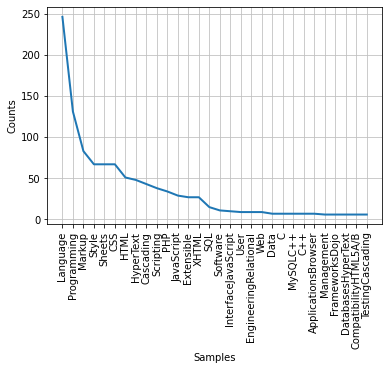

In [2]:
%matplotlib inline
import re

textSkill = raw['SkillName'].str.cat()
textSkill = re.sub(r'\|', '',  textSkill)
tokensSkill = nltk.word_tokenize(textSkill)
#drop parenthesis
for token in tokensSkill:
    if token in [')','(','And']:
        tokensSkill.remove(token)
fdistSkill = nltk.FreqDist(tokensSkill)
fdistSkill.most_common(50) # if we just want a list
fdistSkill.plot(30)

(-0.5, 399.5, 199.5, -0.5)

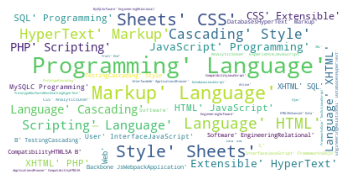

In [3]:
from wordcloud import WordCloud

wcSkill = WordCloud(max_words=50, background_color="white").generate(str(tokensSkill))
# to recolour the image
plt.imshow(wcSkill)
plt.axis("off")

In [4]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

bigramSkill = BigramCollocationFinder.from_words(tokensSkill)
trigramSkill = TrigramCollocationFinder.from_words(tokensSkill)

# only grams that appear 3+ times
bigramSkill.apply_freq_filter(3)
trigramSkill.apply_freq_filter(3)

# return the 10 bi/tri-grams with the highest PMI
print(bigramSkill.nbest(bigram_measures.pmi, 10))
print()
print(trigramSkill.nbest(bigram_measures.pmi, 10))


[('DesignPackaging', 'LabelingServer-SideContent'), ('End', 'DesignPackaging'), ('Front', 'End'), ('SDL', 'TradosJavaScript'), ('CompatibilityHTML5A/B', 'TestingCascading'), ('LabelingServer-SideContent', 'Management'), ('Management', 'SystemsUser'), ('AnalyticsUser', 'ExperienceJavaScript'), ('FrameworksDojo', 'ToolkitJavaScript'), ('C', 'Sharp')]

[('End', 'DesignPackaging', 'LabelingServer-SideContent'), ('Front', 'End', 'DesignPackaging'), ('DesignPackaging', 'LabelingServer-SideContent', 'Management'), ('LabelingServer-SideContent', 'Management', 'SystemsUser'), ('HTML5Enhanced', 'Data', 'GSM'), ('MySQLSoftware', 'EngineeringRelational', 'DatabasesJavaScript'), ('ApplicationsBrowser', 'CompatibilityHTML5A/B', 'TestingCascading'), ('InterfaceWeb', 'ApplicationsBrowser', 'CompatibilityHTML5A/B'), ('InterfaceJavaScript', 'FrameworksDojo', 'ToolkitJavaScript'), ('Web', 'ApplicationsBrowser', 'CompatibilityJavaScript')]


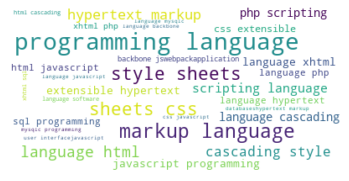

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

dictbigramSkill = [' '.join(tup) for tup in list(nltk.bigrams(tokensSkill))]
#print (dictbigramSkill)

#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictbigramSkill)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#print (words_freq[:100])

#Generating wordcloud and saving as jpg image
words_dict = dict(words_freq)
wordCloud = WordCloud(max_words=30, background_color='white')
wordCloud.generate_from_frequencies(words_dict)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()


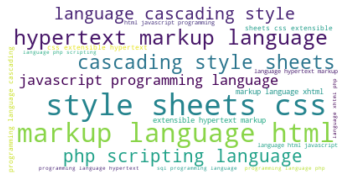

In [6]:
dicttrigramSkill = [' '.join(tup) for tup in list(nltk.trigrams(tokensSkill))]
#print (dicttrigramSkill)

#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(3, 3))
bag_of_words = vectorizer.fit_transform(dicttrigramSkill)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#print (words_freq[:100])

#Generating wordcloud and saving as jpg image
words_dict = dict(words_freq)
wordCloud = WordCloud(max_words=20, background_color='white')
wordCloud.generate_from_frequencies(words_dict)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

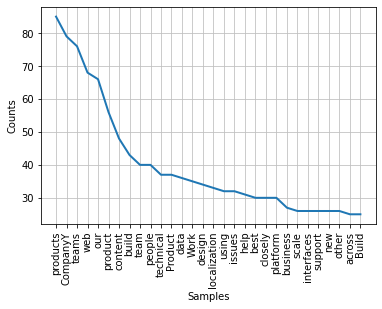

In [7]:
textJob = raw['job_description'].str.cat()
textJob = textJob.translate(str.maketrans('', '', string.punctuation))
tokensJob = nltk.word_tokenize(textJob)
#get rid of punctuation and stopwords
for token in tokensJob:
    if token in stopwords.words('english'):
        tokensJob.remove(token)
    if token in ['the','a']: #remove common articles (better ways to do this but this is fine for now)
        tokensJob.remove(token)  
fdistJob = nltk.FreqDist(tokensJob)
fdistJob.most_common(50) # if we just want a list
fdistJob.plot(30)

(-0.5, 399.5, 199.5, -0.5)

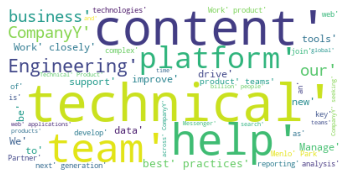

In [8]:
wcJob = WordCloud(max_words=50, background_color="white").generate(str(tokensJob))
# to recolour the image
plt.imshow(wcJob)
plt.axis("off")

In [9]:
bigramJob = BigramCollocationFinder.from_words(tokensJob)
trigramJob = TrigramCollocationFinder.from_words(tokensJob)

# only grams that appear 3+ times
bigramJob.apply_freq_filter(3)
trigramJob.apply_freq_filter(3)

# return the 10 bi/tri-grams with the highest PMI
print(bigramJob.nbest(bigram_measures.pmi, 10))
print()
print(trigramJob.nbest(bigram_measures.pmi, 10))

[('Enhance', 'companywide'), ('Localization', 'Project'), ('News', 'Feed'), ('North', 'America'), ('accessible', 'Connecting'), ('adding', 'many'), ('atscale', 'webapplications'), ('companywide', 'velocity'), ('consumers', 'enthusiasts'), ('deploying', 'atscale')]

[('Enhance', 'companywide', 'velocity'), ('companywide', 'velocity', 'enhancing'), ('consumers', 'enthusiasts', 'meets'), ('deploying', 'atscale', 'webapplications'), ('enthusiasts', 'meets', 'exceeds'), ('regularly', 'deploying', 'atscale'), ('already', 'outside', 'North'), ('outside', 'North', 'America'), ('meets', 'exceeds', 'functional'), ('visually', 'stunning', 'pop')]


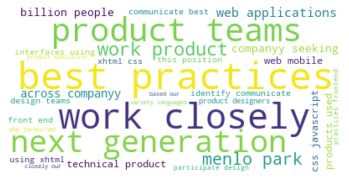

In [10]:
dictbigramJob = [' '.join(tup) for tup in list(nltk.bigrams(tokensJob))]
#print (dictbigramJob)

#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictbigramJob)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freqbiJob =sorted(words_freq, key = lambda x: x[1], reverse=True)
#print (words_freq[:100])

#Generating wordcloud
words_dict = dict(words_freqbiJob)
wordCloud = WordCloud(max_words=30, background_color='white')
wordCloud.generate_from_frequencies(words_dict)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

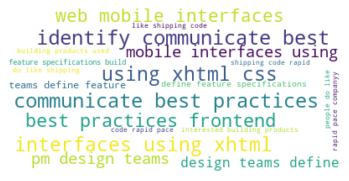

In [11]:
dicttrigramJob = [' '.join(tup) for tup in list(nltk.trigrams(tokensJob))]
#print (dicttrigramJob)

#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(3, 3))
bag_of_words = vectorizer.fit_transform(dicttrigramJob)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#print (words_freq[:100])

#Generating wordcloud
words_dict = dict(words_freq)
wordCloud = WordCloud(max_words=20, background_color='white')
wordCloud.generate_from_frequencies(words_dict)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
for i in range(len(raw['RawTitle'])):
    if 'best practices' in str(raw['job_description'][i]):
        print(raw['RawTitle'][i])
print()
for i in range(len(raw['RawTitle'])):
    if 'SQL' in str(raw['SkillName'][i]):
        print(raw['RawTitle'][i])
print()
for i in range(len(raw['RawTitle'])):
    if ('best practices' in str(raw['job_description'][i]) and 'SQL' in str(raw['SkillName'][i])):
        print(raw['RawTitle'][i])

Bi Engineer (People Analytics)
Front End Engineer, University Grad
Front End Engineer, University Grad
Front End Engineer, Intern/Co-Op
Front End Engineer, University Grad
Front End Engineer, Intern/Co-Op
Data Visualization Designer - Storytelling
Technical Product Specialist
Technical Product Specialist
Front End Engineer (Javascript, Html & Css)
User Interface Engineer
Front End Engineer, Intern/Co-Op
Front End Engineer, Intern/Co-Op
Program Manager, Localization Testing
Project Manager (Localization)
Project Manager (Localization)
Project Manager (Localization)
Project Manager (Localization)
User Interface Engineer
User Interface Engineer (Operations)
Partner Engineer, Apps
Bi Engineer, Business Applications
Project Manager Localization
Partner Engineer, Apps

Bi Engineer (People Analytics)
Instagram-Software Engineer, Product (Full Stack)
Software Engineer, Product (Full Stack)
Software Engineer, Product (Full Stack)
Software Engineer, Product (Full Stack)
Data Visualization Design

In [13]:
def topFreq(n,freq):
    top=[]
    for i in range(n):
        top.append(freq[i][0])
    return top

topbigramJob = topFreq(1000, words_freqbiJob)
print('JobDescription')
print()
for j in topbigramJob:
    if j in str(raw['job_description'][3]):
        print(j)
print()
for j in topbigramJob:
    if j in str(raw['job_description'][56]):
        print(j) 

topSkills = topFreq(200, fdistSkill.most_common(10000))
print()
print("Skills")
print()
for j in topSkills:
    if j in str(raw['SkillName'][3]):
        print(j) 
print()
for j in topSkills:
    if j in str(raw['SkillName'][56]):
        print(j) 

JobDescription

best practices
build report
business users
translate requirements
various business
provide analytics
reporting solutions
support various
various company
company initiatives
business intelligence
dynamic dashboards
dashboards using
development standards
recommend emerging
emerging technologies
landscape components

best practices
product managers
business users
data analysis
translate requirements
various business
reporting solutions
support various
various company
company initiatives
dynamic dashboards
dashboards using
development standards
recommend emerging
emerging technologies
landscape components

Skills

Language
Programming
Markup
Style
Sheets
CSS
HTML
HyperText
Cascading
JavaScript
SQL
Web
Data
C
Management
Java
Performance
Business
Relational
Database
System
Intelligence

Language
Programming
Markup
Style
Sheets
CSS
HTML
HyperText
Cascading
JavaScript
SQL
Data
C
Java
Business
Intelligence


In [14]:
for j in topbigramJob:
    if (j in str(raw['job_description'][3]) and j not in str(raw['job_description'][56])) or (j not in str(raw['job_description'][3]) and j in str(raw['job_description'][56])):
        print(j) 
print()
for j in topSkills:
    if (j in str(raw['SkillName'][3]) and j not in str(raw['SkillName'][56])) or (j not in str(raw['SkillName'][3]) and j in str(raw['SkillName'][56])):
        print(j) 

build report
product managers
data analysis
provide analytics
business intelligence

Web
Management
Performance
Relational
Database
System
